In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import calibration
from skimage.io import imsave
import rasterio

In [63]:
with open("produce.p", 'rb') as f:
    images = pickle.load(f)
    
with open("s_panel.p", "rb") as f:
    panel = pickle.load(f)

In [64]:
cal_imgs = []

for img in images:
    cal = calibration.calibrate(panel, img)
    cal_imgs.append(cal)

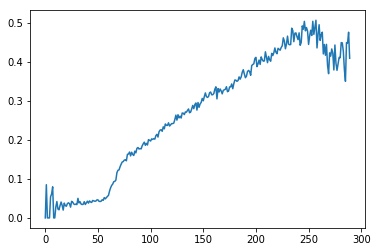

In [68]:
plt.plot(cal_imgs[0][410, 600, :])
plt.show()

In [39]:
cal_crop_imgs = []
for i in range(len(cal_imgs)):
    i1 = np.squeeze(cal_imgs[i][:, 0:350, [np.arange(50, 250, 20)]])
    i2 = np.squeeze(cal_imgs[i][:, 350:, [np.arange(50, 250, 20)]])
    
    cal_crop_imgs.append(i1)
    cal_crop_imgs.append(i2)

In [40]:
print(cal_crop_imgs[0].shape)

(299, 350, 10)


In [41]:
for i in range(len(cal_crop_imgs)):
    fname = "Images/" + "tomato_" + str(i) + ".tiff"
    imsave(fname, cal_crop_imgs[i], plugin="tifffile", photometric='minisblack', planarconfig='contig')

## Display an image

In [58]:
sample = []
with rasterio.open("Images/fresh/tomato_2.tiff") as src:
    for b in range(1, 11):
        sample.append(src.read(b))

sample = np.stack(sample, axis=2).astype("float32")

/Users/senecal/miniconda3/envs/hyperspectral/lib/python3.6/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


In [59]:
print(sample.shape)

(355, 350, 10)


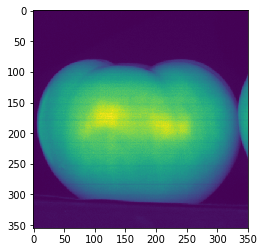

In [60]:
plt.imshow(sample[:,:,5])

In [ ]:
rgb_img = calibration.get_plottable_rgb(sample)
plt.imshow(rgb_img)

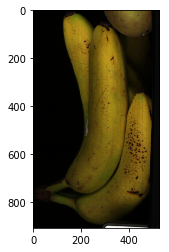

In [66]:
rgb_img = calibration.get_plottable_rgb(cal_imgs[0])
plt.imshow(rgb_img)